In [1]:
import geostatspy.GSLIB as GSLIB          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats    # GSLIB methods convert to Python 
import pandas as pd
import numpy as np                        # set working directory, run executables
import matplotlib.pyplot as plt           # for plotting
from scipy import stats                   # summary statistics

class Univariate():
    def __init__(self,welldata):
        self.filename = welldata # set filename
        self.welldata = pd.read_csv(welldata) # read well data into dataframe
        #self.sandstone = self.welldata.loc[(data.welldata['Facies'] == 1)] # Group by facies (Sandstone)
        #self.shale = self.welldata.loc[(data.welldata['Facies'] == 0)] # Group by facies (Shale)

        
    def comp_outliers(self,dataframe,metric):
        # computes the upper and lower fence based on Tukey 1.5 x IQR method and returns an array of format 
        # [lower_fence,upper_fence]
        P25 = np.percentile(dataframe[metric].values,25)
        P75 = np.percentile(dataframe[metric].values,75)
        lower_fence = P25 - 1.5*(P75-P25)
        upper_fence = P75 + 1.5*(P75-P25)
        if lower_fence < 0.0:
            lower_fence = 0.0
        return [lower_fence,upper_fence]
    
    def remove_outliers(self,dataframe,metric):
        # removes outliers from dataframe and returns new dataframe without outliers
        bounds = self.comp_outliers(dataframe,metric)
        cleaned_data = dataframe.loc[(dataframe[metric] >= bounds[0]) & (dataframe[metric] <= bounds[1])]
        return cleaned_data 
    

In [5]:
data = Univariate('1_sample_data.csv')

data.welldata.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,271.0,294.247232,172.581236,0.000000,145.500000,291.000000,449.500000,583.000000
X,271.0,479.501845,286.991468,0.000000,240.000000,480.000000,710.000000,990.000000
Y,271.0,526.092251,283.632200,9.000000,299.000000,519.000000,760.000000,1014.000000
Facies,271.0,0.771218,0.420826,0.000000,1.000000,1.000000,1.000000,1.000000
Porosity,271.0,0.141707,0.028341,0.060693,0.121702,0.139365,0.157774,0.221607
Perm,271.0,405.800235,2187.349333,0.018054,1.583239,7.817239,52.040563,24182.542972
AI,271.0,5174.470023,1136.028676,1808.774980,4481.353010,5111.164955,5956.595128,8260.108949


In [6]:
Sandstone = data.welldata.loc[(data.welldata['Facies'] == 1)] # Group by facies (Sandstone)
Shale = data.welldata.loc[(data.welldata['Facies'] == 0)] # Group by facies (Shale)

## Removing outliers

### Sandstone

In [12]:
Sandstone_cleaned_por = data.remove_outliers(Sandstone,'Porosity')
Sandstone_cleaned_por_perm = data.remove_outliers(Sandstone_cleaned_por,'Perm')
Sandstone_final = data.remove_outliers(Sandstone_cleaned_por_perm,'AI')
Sandstone_final.to_csv('Sandstone_cleaned.csv')
Sandstone_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,164.0,291.384146,171.402636,0.000000,144.500000,294.500000,433.500000,583.000000
X,164.0,473.963415,263.179285,0.000000,240.000000,480.000000,690.000000,990.000000
Y,164.0,543.701220,261.416814,39.000000,354.000000,529.000000,751.500000,1014.000000
Facies,164.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Porosity,164.0,0.141945,0.021228,0.095861,0.126620,0.141629,0.153456,0.204388
Perm,164.0,23.033024,34.867885,0.051426,2.321887,7.817239,28.539127,193.746824
AI,164.0,5101.614178,933.384251,3017.611167,4510.886339,5005.947121,5733.632011,7305.189368


### Shale

In [13]:
Shale_cleaned_por = data.remove_outliers(Shale,'Porosity')
Shale_cleaned_por_perm = data.remove_outliers(Shale_cleaned_por,'Perm')
Shale_final = data.remove_outliers(Shale_cleaned_por_perm,'AI')
Shale_final.to_csv('Shale_cleaned.csv')
Shale_final.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,53.0,296.924528,182.984746,8.000000,135.000000,288.000000,465.000000,580.000000
X,53.0,577.452830,348.970495,10.000000,190.000000,710.000000,880.000000,990.000000
Y,53.0,413.207547,306.251051,9.000000,120.000000,339.000000,719.000000,1014.000000
Facies,53.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Porosity,53.0,0.115015,0.020962,0.060693,0.100367,0.114894,0.128914,0.160937
Perm,53.0,2.573466,3.058961,0.018054,0.268076,0.888961,4.979026,11.605383
AI,53.0,6099.268353,886.103245,4227.070196,5574.433666,6174.244316,6684.167663,7911.757046


# Plots

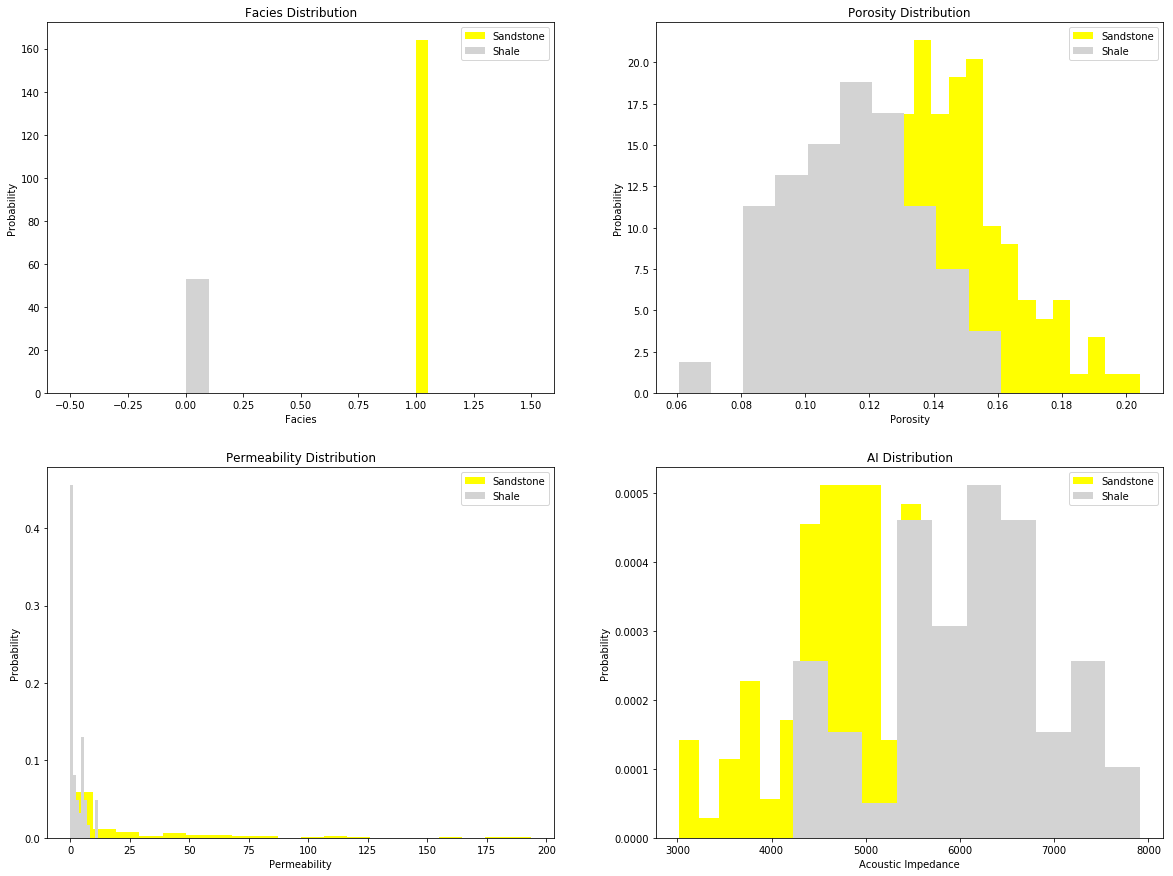

In [18]:
# univariate histograms
n_bins_sandstone = 20
n_bins_shale = 10

fig, ax2 = plt.subplots(2,2, figsize=(20,15))

# Facies
ax2[0,0].hist(Sandstone_final['Facies'], bins=n_bins_sandstone, color='yellow', label='Sandstone')
ax2[0,0].hist(Shale_final['Facies'], bins=n_bins_shale, color='lightgray', label='Shale')
ax2[0,0].set_title('Facies Distribution')
ax2[0,0].set_ylabel('Probability')
ax2[0,0].set_xlabel('Facies')
ax2[0,0].legend()

# Porosity
ax2[0,1].hist(Sandstone_final['Porosity'], bins=n_bins_sandstone,density=True, color='yellow', label='Sandstone')
ax2[0,1].hist(Shale_final['Porosity'], bins=n_bins_shale,density=True, color='lightgray', label='Shale')
ax2[0,1].set_title('Porosity Distribution')
ax2[0,1].set_ylabel('Probability')
ax2[0,1].set_xlabel('Porosity')
ax2[0,1].legend()

# Permeability
ax2[1,0].hist(Sandstone_final['Perm'], bins=n_bins_sandstone,density=True, color='yellow', label='Sandstone')
ax2[1,0].hist(Shale_final['Perm'], bins=n_bins_shale,density=True, color='lightgray', label='Shale')
ax2[1,0].set_title('Permeability Distribution')
ax2[1,0].set_ylabel('Probability')
ax2[1,0].set_xlabel('Permeability')
ax2[1,0].legend()

# Acoustic Impedence
ax2[1,1].hist(Sandstone_final['AI'], bins=n_bins_sandstone,density=True, color='yellow', label='Sandstone')
ax2[1,1].hist(Shale_final['AI'], bins=n_bins_shale,density=True, color='lightgray', label='Shale')
ax2[1,1].set_title('AI Distribution')
ax2[1,1].set_ylabel('Probability')
ax2[1,1].set_xlabel('Acoustic Impedance')
ax2[1,1].legend()

plt.show()

In [2]:
Sandstone_cleaned = pd.read_csv('Sandstone_cleaned.csv')
Shale_cleaned = pd.read_csv('Shale_cleaned.csv')
Total_cleaned = pd.concat([Sandstone_cleaned,Shale_cleaned])

## Facies Location Maps (without outliers)

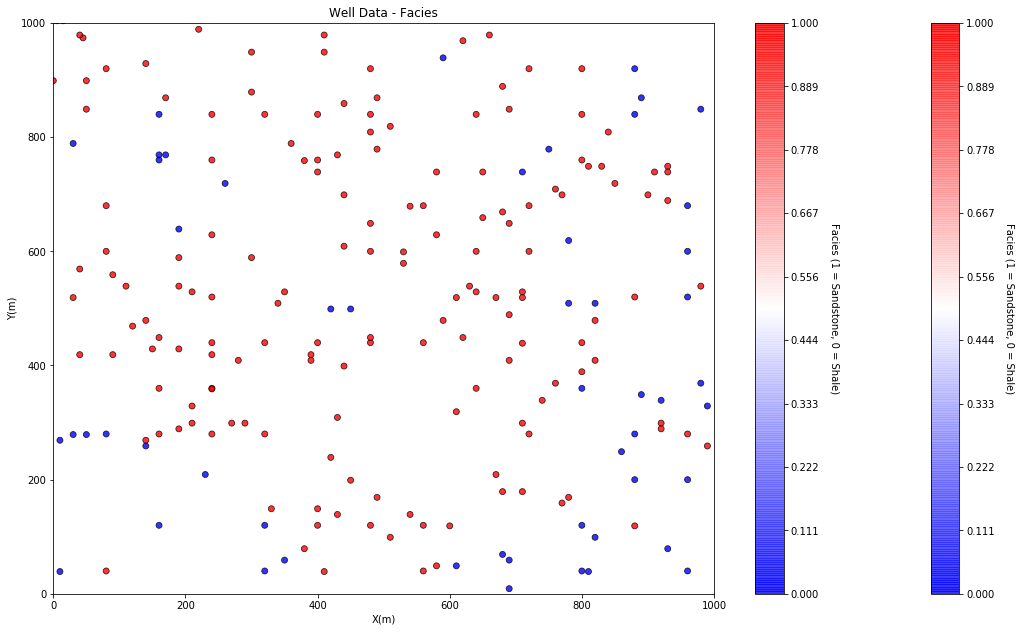

In [38]:
Fmin = 0; Fmax = 1
GSLIB.locmap_st(Sandstone_cleaned,'X','Y','Facies',xmin,xmax,ymin,ymax,Fmin,Fmax,'Well Data - Facies','X(m)','Y(m)','Facies (1 = Sandstone, 0 = Shale)',plt.cm.bwr)
GSLIB.locmap_st(Shale_cleaned,'X','Y','Facies',xmin,xmax,ymin,ymax,Fmin,Fmax,'Well Data - Facies','X(m)','Y(m)','Facies (1 = Sandstone, 0 = Shale)',plt.cm.bwr)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.savefig('Facies_all_loc',dpi=300,bbox_inches="tight")

## Porosity Location Maps (without outliers)

In [31]:
pormin_sand = np.amin(Sandstone_cleaned['Porosity'].values)
pormax_sand = np.amax(Sandstone_cleaned['Porosity'].values)
pormin_shale = np.amin(Shale_cleaned['Porosity'].values)
pormax_shale = np.amax(Shale_cleaned['Porosity'].values)
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values

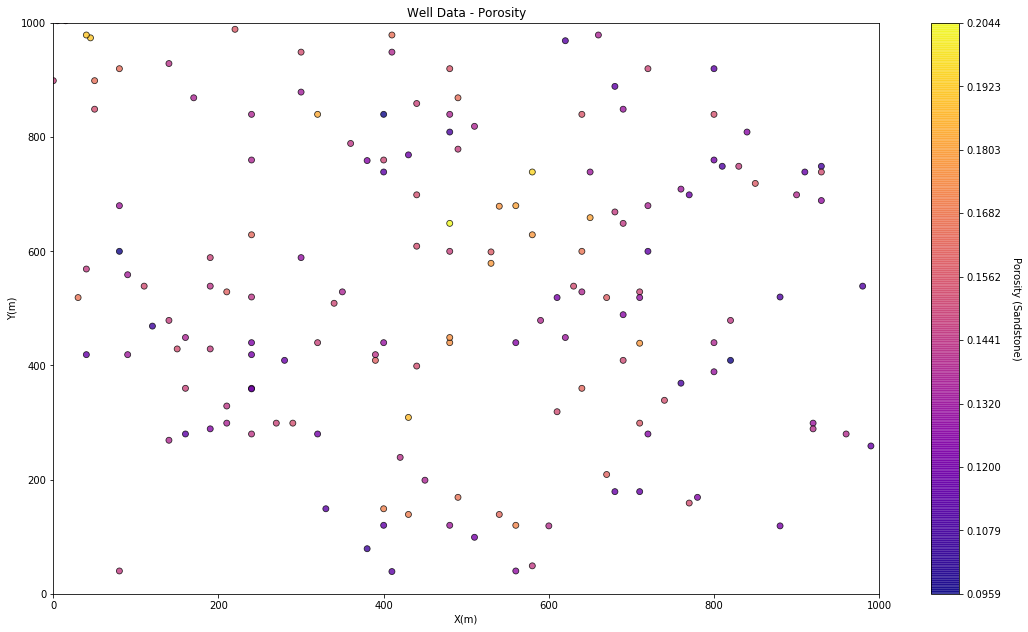

In [32]:
GSLIB.locmap_st(Sandstone_cleaned,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin_sand,pormax_sand,'Well Data - Porosity','X(m)','Y(m)','Porosity (Sandstone)',plt.cm.plasma)
#GSLIB.locmap_st(Shale_cleaned,'X','Y','Porosity',xmin,xmax,ymin,ymax,pormin_shale,pormax_shale,'Well Data - Porosity','X(m)','Y(m)','Porosity (Shale)',plt.cm.gray)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.savefig('Porosity_Sandstone_loc',dpi=300,bbox_inches="tight")

## Permeability Location Maps (without outliers)

In [33]:
permmin_sand = np.amin(Sandstone_cleaned['Perm'].values)
permmax_sand = np.amax(Sandstone_cleaned['Perm'].values)
permmin_shale = np.amin(Shale_cleaned['Perm'].values)
permmax_shale = np.amax(Shale_cleaned['Perm'].values)
xmin = 0.0; xmax = 1000.0               # range of x values
ymin = 0.0; ymax = 1000.0               # range of y values

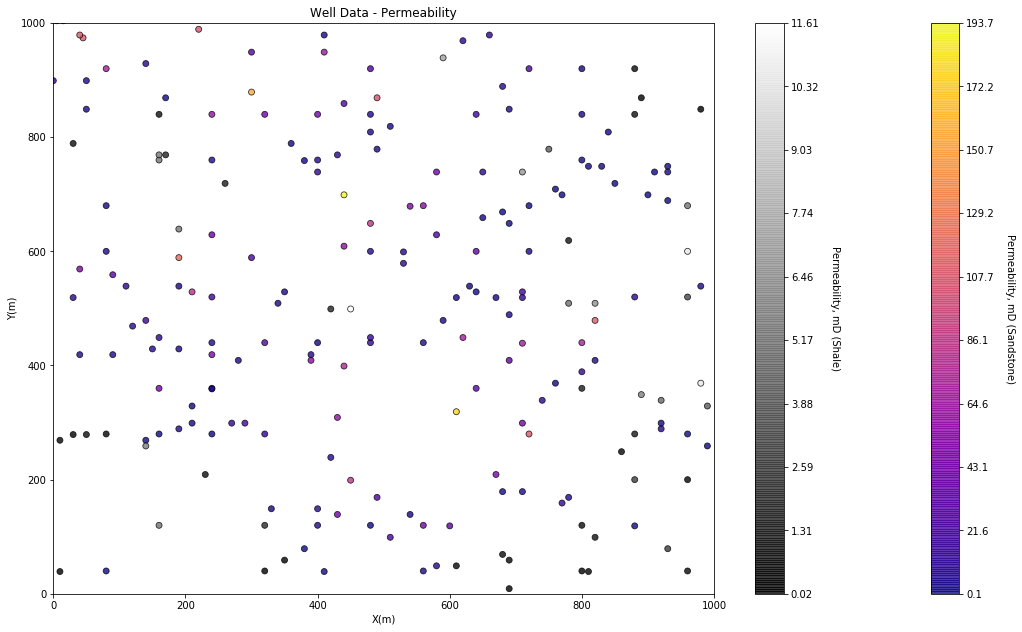

In [34]:
GSLIB.locmap_st(Sandstone_cleaned,'X','Y','Perm',xmin,xmax,ymin,ymax,permmin_sand,permmax_sand,'Well Data - Permeability','X(m)','Y(m)','Permeability, mD (Sandstone)',plt.cm.plasma)
GSLIB.locmap_st(Shale_cleaned,'X','Y','Perm',xmin,xmax,ymin,ymax,permmin_shale,permmax_shale,'Well Data - Permeability','X(m)','Y(m)','Permeability, mD (Shale)',plt.cm.gray)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.savefig('Permeability_all_loc',dpi=300,bbox_inches="tight")